#  Homework 1 (HW1)
Deadline: October 2. Midnight

Hand in: the homework must be handed in through the Moodle system. 

Provide a written answer if requested in the exercise!


Collaborator: Adam Huang 

Name: Giang Khuat

---

## Exercise 1 (HW1/1)

In this exercise we will investigate income inequality and life expectancy indicators for different countries and regions. (60%)

**a)** Import the *countries.csv* file (located in the Data folder of the parent directory of the current file) into a pandas DataFrame and name it *countries*. (Hint: use relative path). From the Gapminder database (http://www.gapminder.org/data/), find and import the *Income per person (GDP/capita, PPP$ inflation-adjusted)* and *Life expentancy (years)* files into pandas Dataframes; name them *income* and *life_exp* respectively. You should import the data directly from the web page, without dowloading it to your computer. (Hint: Use the  *pandas.read_excel()* function!) <br>


In [91]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= 10,8

In [92]:
import pandas as pd

In [93]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [188]:
countries = pd.read_csv("./Data/countries.csv")
f = "https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xlsx"
income = pd.read_excel(f)
life_exp = pd.read_excel("https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj2tPLxKvvnNPA&output=xlsx")

In [95]:
life_exp.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


**b)** Represent the distribution of income per capita (across countries) for a given year (for example: 2007) with a histogram!  



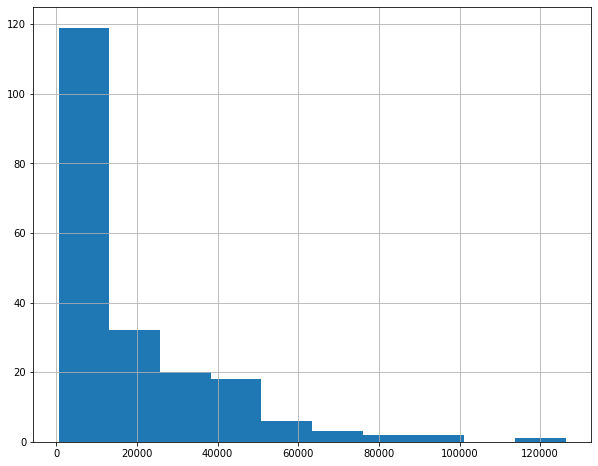

In [96]:
income[2007].hist()

In [97]:
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [98]:
def mergeDataframe(year):
    income_frame = income[['GDP per capita', year]]
    income_col = "Income"
    income_frame_rename = income_frame.rename(columns={year: income_col })
    #print(income_frame_rename)
    
    life_expect = life_exp[['Life expectancy',year]]
    life_exp_col = "Life Expect"
    life_expect_rename = life_exp.rename(columns={year: life_exp_col})
    
    # Merging income and life expectancy
    df = income_frame_rename.merge(life_expect_rename, left_on='GDP per capita', right_on='Life expectancy')
    # Merging with countries
    bigDataframe = df.merge(countries, left_on='GDP per capita', right_on='Country').drop('GDP per capita', axis=1)
    bigDataframe = bigDataframe[['Country', 'Region', income_col, life_exp_col]]
    return bigDataframe

In [99]:
mergedFrame = mergeDataframe(2012)
mergedFrame.head()

,Country,Region,Income,Life Expect
0,Afghanistan,ASIA,1893.0,54.4
1,Albania,EUROPE,9811.0,77.5
2,Algeria,AFRICA,12779.0,76.2
3,Andorra,EUROPE,41926.0,84.7
4,Angola,AFRICA,7230.0,58.5


**d)** Using the dataframe created in point c), present a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) of the distribution of income per capita (across countries) for the years 1950 and 2010 grouped by region (continent). What changed in 60 years?
(Hints: 1. Use the *pd.boxplot* function! 2. Use a logarithmic scale for the income axis!)

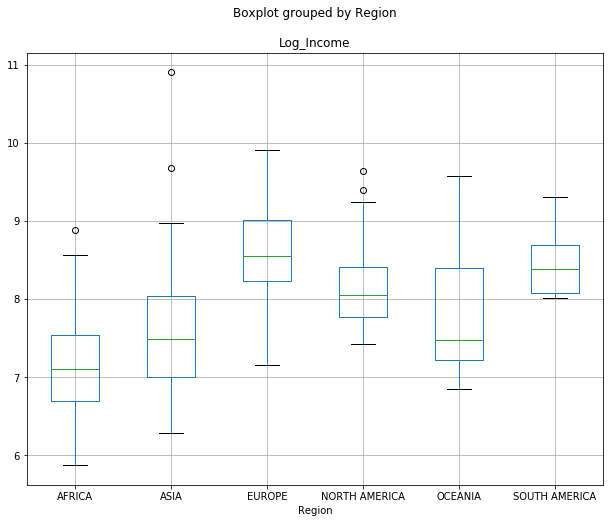

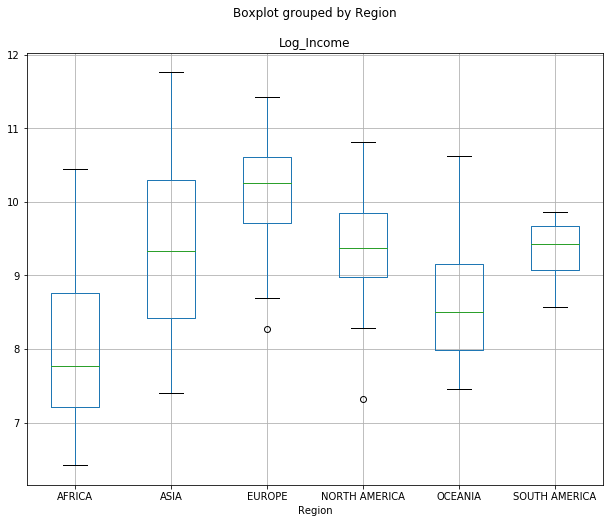

In [100]:
import numpy as np
income_1950 = mergeDataframe(1950)
income_2010 = mergeDataframe(2010)
income_1950['Log_Income'] = np.log(income_1950['Income'])
income_2010['Log_Income'] = np.log(income_2010['Income'])
#print(income_1950.head())
boxplot_1950 = income_1950.boxplot(column='Log_Income',by="Region")
boxplot_2010 = income_2010.boxplot(column='Log_Income', by='Region')

After 60 years, we see that even though Europe still has the highest mean and median income per capita, Asian people's income has risen to a level that its mean and median is equal to North America. Also, the middle 50 percentile has become wider than 60 years ago, which means that there are more countries growing faster. This is also the same for Africa, in which the middle 50 percentile has become wider than 60 years ago, which means that more countries are growing faster. 

Europe and North America's people income per capita have also increased but the distribution of the middle 50 percentile remained as before (it does not become wider)

**e)** Represent the relationship between income per capita and life expectancy for a given year using a [scatter plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html) based on the dataframe created in point c). (Hint: choose a year where there aren't many missing values!) 
What can you conclude from the plot? <span style="color:red">(Provide a written answer!)</span>

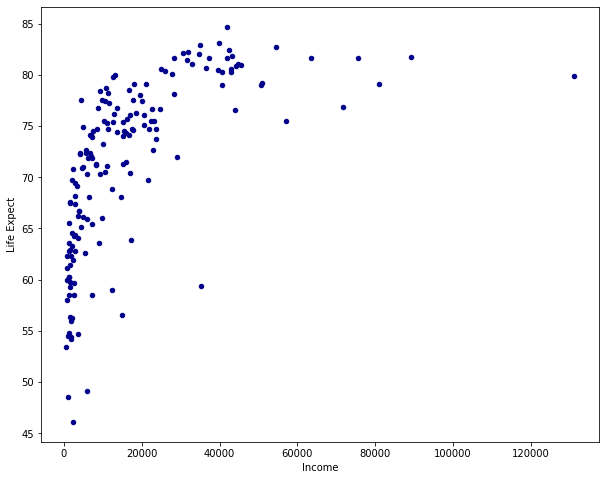

In [101]:
income_life_plot = mergedFrame.plot.scatter(x="Income", y="Life Expect", c="DarkBlue")

In [ ]:
# We can conclude that as income increases, life expectancy also increases logarithmically. This shows that as people's income increase, they can afford
# more so their income can grow faster. At lower income level (20,000 to 40,000) small increase in income leads to large increase in life expectancy level, but at
# higher income level (starting from 45,000) the increase is life expectancy becomes less obvious. There seems to be no effect
# on life expectancy from income

## Exercise 2 (HW1/2)

In this exercise we will investigate the data scientist job offers of the the most important job search website in the U.S ([indeed.com](http://www.indeed.com)). (40%)

**a)**  Using the *urllib* and *BeautifulSoap* packages, import the search results for the keyword *data science*, that is, the content of this URL: http://www.indeed.com/jobs?q=data+scientist&l= 

Write a function that returns the number of results of the query, i.e. the number of job offers! (Hint: Check the searchCount HTML-tag!)

In [2]:
import bs4
from urllib.request import urlopen
import re

In [3]:
# Load the information
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
source = urlopen(url).read().decode('utf-8')
soup = bs4.BeautifulSoup(source, "lxml")
#print(soup.prettify())

In [4]:
def find_num_jobOffers():
	string = soup.findAll(id='searchCountPages')
	line = string[0].get_text()
	results = re.findall(r'\d+', line)
	job_offers = results[1] + results[2]
	return int(job_offers)

print(find_num_jobOffers())

11880


**b)** What are the most common terms in the job offer adds on indeed.com? Analize the first 100 search result pages and create a word cloud of the most popular terms! 

(Hint: You can access the search result pages as: https://www.indeed.com/jobs?q=data%20scientist&start=0, https://www.indeed.com/jobs?q=data%20scientist&start=10, https://www.indeed.com/jobs?q=data%20scientist&start=20 and so on by 10 up to https://www.indeed.com/jobs?q=data%20scientist&start=990. It may take a few minutes so it is recommended to test your code on one or two pages first and if it works correctly then apply it to the rest of the pages. This way you will save a lot of time if your code needs debugging. ) 
 

(Hint: You can find more information on how to create a Word Cloud at https://www.datacamp.com/community/tutorials/wordcloud-python)

**c)** From the previously collected data, retrieve the job offers' location information and represent the 10 most frequent cities on a [horizontal bar chart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)! Filter the "United States" and "Remote" locations from the results, look for cities only!

(Hint: You can find the necessary information in the "location" HTML-tag.)

In [5]:
import numpy as np
import string

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import operator
import wordcloud

In [182]:
stopwords = np.loadtxt(fname='StopWords.txt', dtype="str")
url = "https://www.indeed.com/jobs?q=data%20scientist&start="
#source_2 = urlopen(sample_url).read().decode('utf-8')
#soup2 = bs4.BeautifulSoup(source_2, "lxml")

dic = {}

def produce_soup(counter):
    sample_url= url + str(counter * 10)
    sample_source = urlopen(sample_url).read().decode('utf-8')
    soup = bs4.BeautifulSoup(sample_source, "lxml")
    return soup

def remove_punc(text):
    for punc in string.punctuation:
        text.replace(punc, "")
    return text

def split_text(dic, text):
    splitted_text = text.split()
    # Transform to lowercase
    lower_text = text.lower()
    # Remove punctuation
    clean_text = remove_punc(lower_text)
    words = clean_text.split()
    return words

def iterate_pages(dic):
    for counter in range(0, 100):    
        text =  produce_soup(counter).findAll(class_='summary')
        length = len(text)
        for i in range(0, length):
            post = text[i].get_text()
            list_of_words = split_text(dic, post)
            for word in list_of_words:
                if word not in stopwords:
                    if word not in dic:
                        dic[word] = 1
                    else:
                        dic[word] += 1
    # Sort by values
    list_of_pairs = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
    return list_of_pairs

cloudtext = ""
pairLists = iterate_pages(dic)

def generate_cloud(list_pairs, cloudtext):
    for i in range(0,20):
        cloudtext += list_pairs[i][0] + ' '
    return cloudtext
    


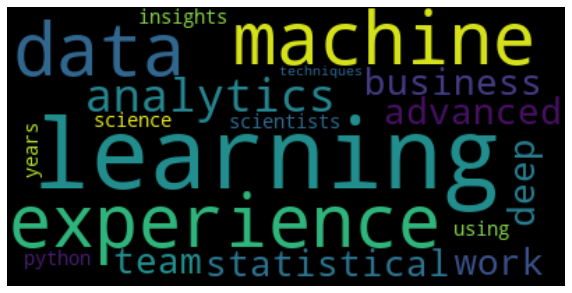

In [183]:
cloud = wordcloud.WordCloud().generate(text=generate_cloud(pairLists, cloudtext))    
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [184]:
cities_dic = {}

def iterate_pages_for_location(cities_dic):
    for counter in range(0, 100):    
        text =  produce_soup(counter).findAll(class_='location')
        length = len(text)
        for i in range(0, length):
            # split array
            city_array = text[i].get_text().split(",")
            # if the array's length > 2, it is a city and state
            if (len(city_array) >= 2):
                city_name = city_array[0]
                if city_name not in cities_dic:
                    cities_dic[city_name] = 1
                else:
                    cities_dic[city_name] += 1
                    
iterate_pages_for_location(cities_dic)
    

In [185]:
sorted_cities = sorted(cities_dic.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_cities)

[('New York', 109), ('San Francisco', 65), ('Seattle', 42), ('Atlanta', 40), ('Boston', 31), ('Austin', 18), ('Chicago', 17), ('Washington', 16), ('Palo Alto', 16), ('Houston', 16), ('Redmond', 12), ('Denver', 12), ('Sunnyvale', 12), ('St. Louis', 11), ('Plano', 11), ('Tempe', 11), ('San Diego', 11), ('Bellevue', 10), ('Irving', 9), ('Charlotte', 9), ('San Jose', 9), ('Menlo Park', 9), ('Phoenix', 8), ('Spring', 8), ('Baltimore', 8), ('Orlando', 8), ('Salt Lake City', 8), ('Santa Clara Valley', 8), ('Reston', 7), ('Cambridge', 7), ('Tampa', 7), ('Los Angeles', 7), ('Pittsburgh', 6), ('Kansas City', 6), ('Portland', 6), ('Dallas', 6), ('Redwood City', 6), ('Fort Worth', 5), ('Santa Clara', 5), ('Boulder', 5), ('Columbus', 5), ('Las Vegas', 5), ('South San Francisco', 5), ('Manhattan', 5), ('Birmingham', 5), ('Lehi', 4), ('Irvine', 4), ('Hoboken', 4), ('Dearborn', 4), ('Draper', 4), ('Boise', 4), ('Broomfield', 4), ('McLean', 4), ('Lewisville', 3), ('Columbia', 3), ('Lexington', 3), ('Ed

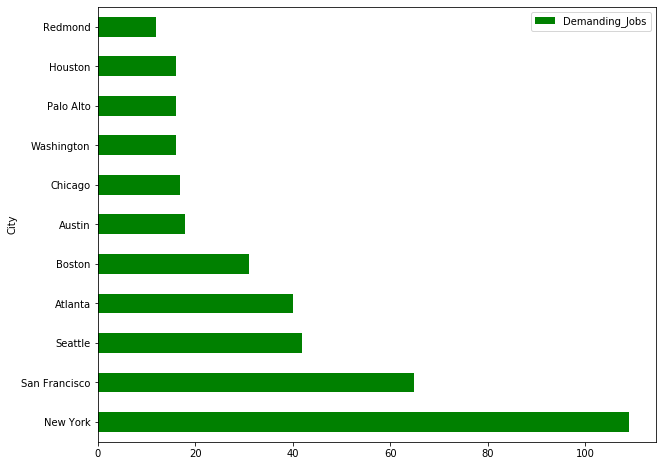

In [186]:
cities_name = []
freq_cities = []
def get_cities_list(sorted_cities):
    for i in range (0, 11):
        cities_name.append(sorted_cities[i][0])

get_cities_list(sorted_cities)
                           
def get_frequency(sorted_cities):
    for i in range (0, 11):
        freq_cities.append(sorted_cities[i][1])
 
get_frequency(sorted_cities)
                           
df = pd.DataFrame({"City": cities_name, "Demanding_Jobs": freq_cities})
ax = df.plot.barh(x="City", y="Demanding_Jobs", color="Green")